In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('C:/Users/Administrator/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


EDA:

1) No. of employees in the dataset? How many left the company?

In [53]:
total_employees = len(df)
print(f"Total number of employees: {total_employees}")

attrition_counts = df['Attrition'].value_counts()
print("\nNumber of employees who left(Yes) vs stayed(No):")
print(attrition_counts)

Total number of employees: 1470

Number of employees who left(Yes) vs stayed(No):
Attrition
No     1233
Yes     237
Name: count, dtype: int64


2) Average age of employees who left vs. stayed?

In [54]:
average_age = df.groupby('Attrition')['Age'].mean()
print("Average age of employees who left vs. stayed:")
print(average_age)

Average age of employees who left vs. stayed:
Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


3) Attrition rate across departments?

In [55]:
attrition_by_dept = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

attrition_by_dept['Total'] = attrition_by_dept['No'] + attrition_by_dept['Yes']
attrition_by_dept['Attrition_Rate (%)'] = (attrition_by_dept['Yes'] / attrition_by_dept['Total']) * 100

print("Attrition rate across different departments:")
print(attrition_by_dept[['Total', 'Yes', 'Attrition_Rate (%)']].sort_values(by='Attrition_Rate (%)', ascending=False))

Attrition rate across different departments:
Attrition               Total  Yes  Attrition_Rate (%)
Department                                            
Sales                     446   92           20.627803
Human Resources            63   12           19.047619
Research & Development    961  133           13.839750


4) Is there any correlation between distance from home and attrition?

In [56]:
# Use point-biserial correlation(appropriate for continuous variable, binary variable)
# Converting 'Attrition' to a binary numerical variable(Yes=1, No=0)

df_corr = df.copy()
df_corr['Attrition_Numeric'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
correlation = df_corr['DistanceFromHome'].corr(df_corr['Attrition_Numeric'])
print(f"Correlation between DistanceFromHome and Attrition: {correlation:.4f}")
print("Value ~ 0 = weak correlation. \nValue ~ 1/-1 = strong +ve/-ve correlation respectively")

Correlation between DistanceFromHome and Attrition: 0.0779
Value ~ 0 = weak correlation. 
Value ~ 1/-1 = strong +ve/-ve correlation respectively


5) Relationship between overtime and attrition?

In [57]:
overtime_attrition_counts = df.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)
overtime_attrition_counts['Total'] = overtime_attrition_counts['No'] + overtime_attrition_counts['Yes']
overtime_attrition_counts['Attrition_Rate (%)'] = (overtime_attrition_counts['Yes'] / overtime_attrition_counts['Total']) * 100

print("Attrition counts and rates by OverTime status:")
print(overtime_attrition_counts[['Total', 'Yes', 'Attrition_Rate (%)']].sort_values(by='Attrition_Rate (%)', ascending=False))

Attrition counts and rates by OverTime status:
Attrition  Total  Yes  Attrition_Rate (%)
OverTime                                 
Yes          416  127           30.528846
No          1054  110           10.436433


6) Impact of monthly income on attrition

In [58]:
avg_mon_income_by_att = df.groupby('Attrition')['MonthlyIncome'].mean()
print("Average Monthly Income of employees who left vs. stayed:")
print(avg_mon_income_by_att)

# We can also look at the median to be less sensitive to outliers
med_mon_income_by_att = df.groupby('Attrition')['MonthlyIncome'].median()
print("\nMedian Monthly Income of employees who left vs. stayed:")
print(med_mon_income_by_att)

Average Monthly Income of employees who left vs. stayed:
Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

Median Monthly Income of employees who left vs. stayed:
Attrition
No     5204.0
Yes    3202.0
Name: MonthlyIncome, dtype: float64


7) Features having most missing values (if any)?

In [59]:
missing_values = df.isnull().sum().sort_values(ascending=False)

if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("Count of missing values per feature:")
    print(missing_values[missing_values > 0])

There are no missing values in the dataset.


VISUALIZATIONS:

1) Bar chart: Count of employees by Attrition.

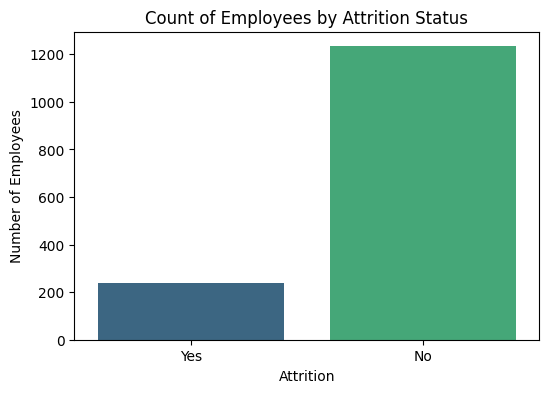

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='viridis', hue='Attrition', legend=False)
plt.title('Count of Employees by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

2) Boxplot: MonthlyIncome vs Attrition.

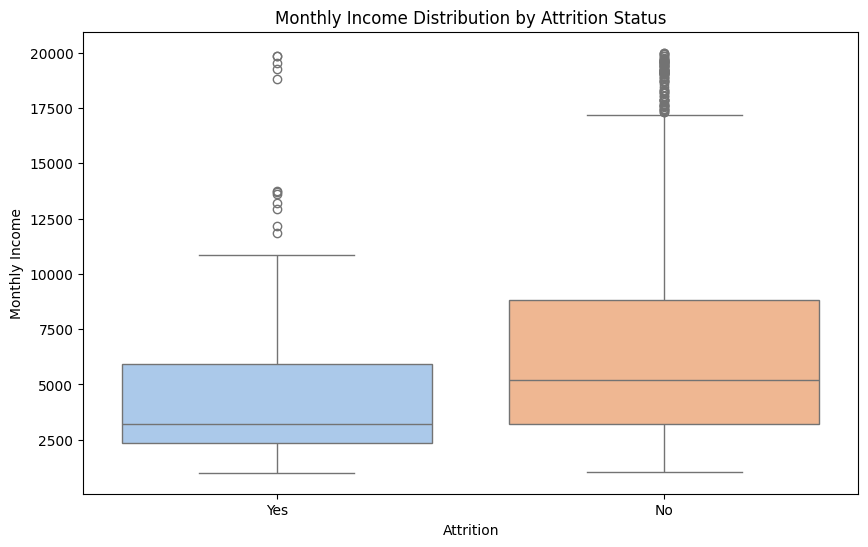

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel',hue='Attrition', legend=False)
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


3) Histogram: Age distribution by Attrition.

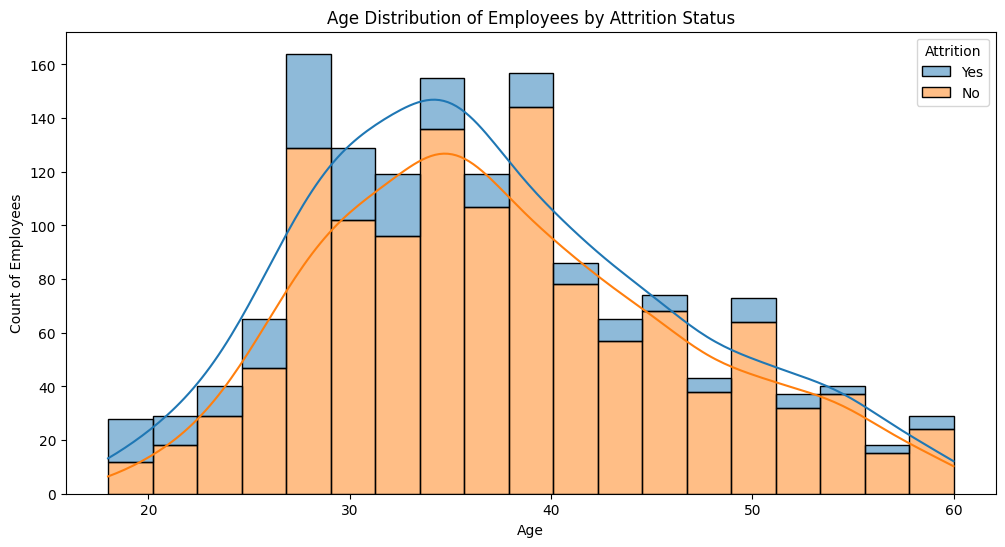

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack', palette='tab10')
plt.title('Age Distribution of Employees by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count of Employees')
plt.show()

4) Stacked bar chart: Department vs Attrition.

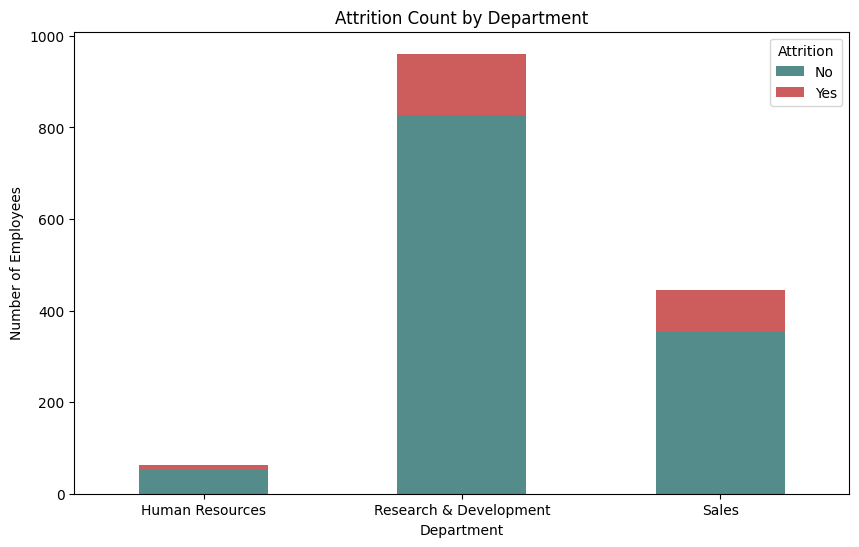

In [63]:
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()
dept_attrition.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#548b8b', '#cd5c5c'])
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Attrition')
plt.show()

5) Countplot: JobSatisfaction by Attrition.



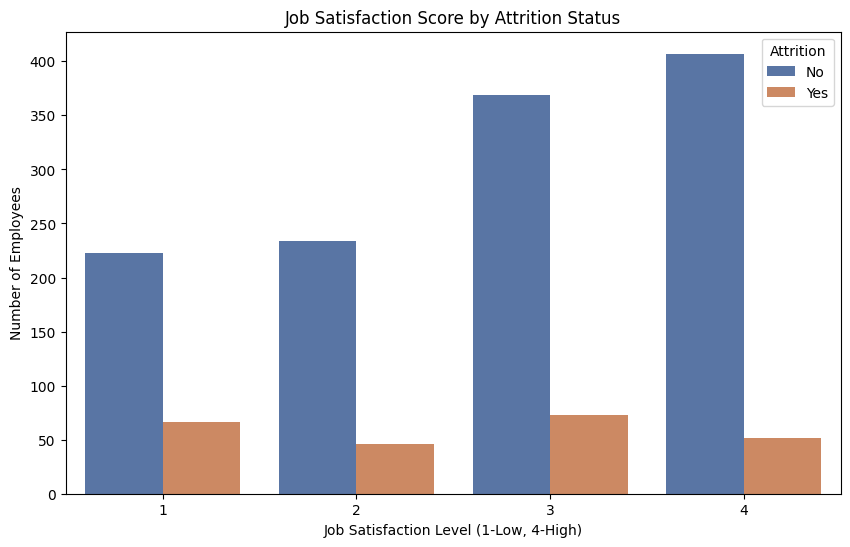

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='deep')
plt.title('Job Satisfaction Score by Attrition Status')
plt.xlabel('Job Satisfaction Level (1-Low, 4-High)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

6) Heatmap: Correlation between numerical variables.

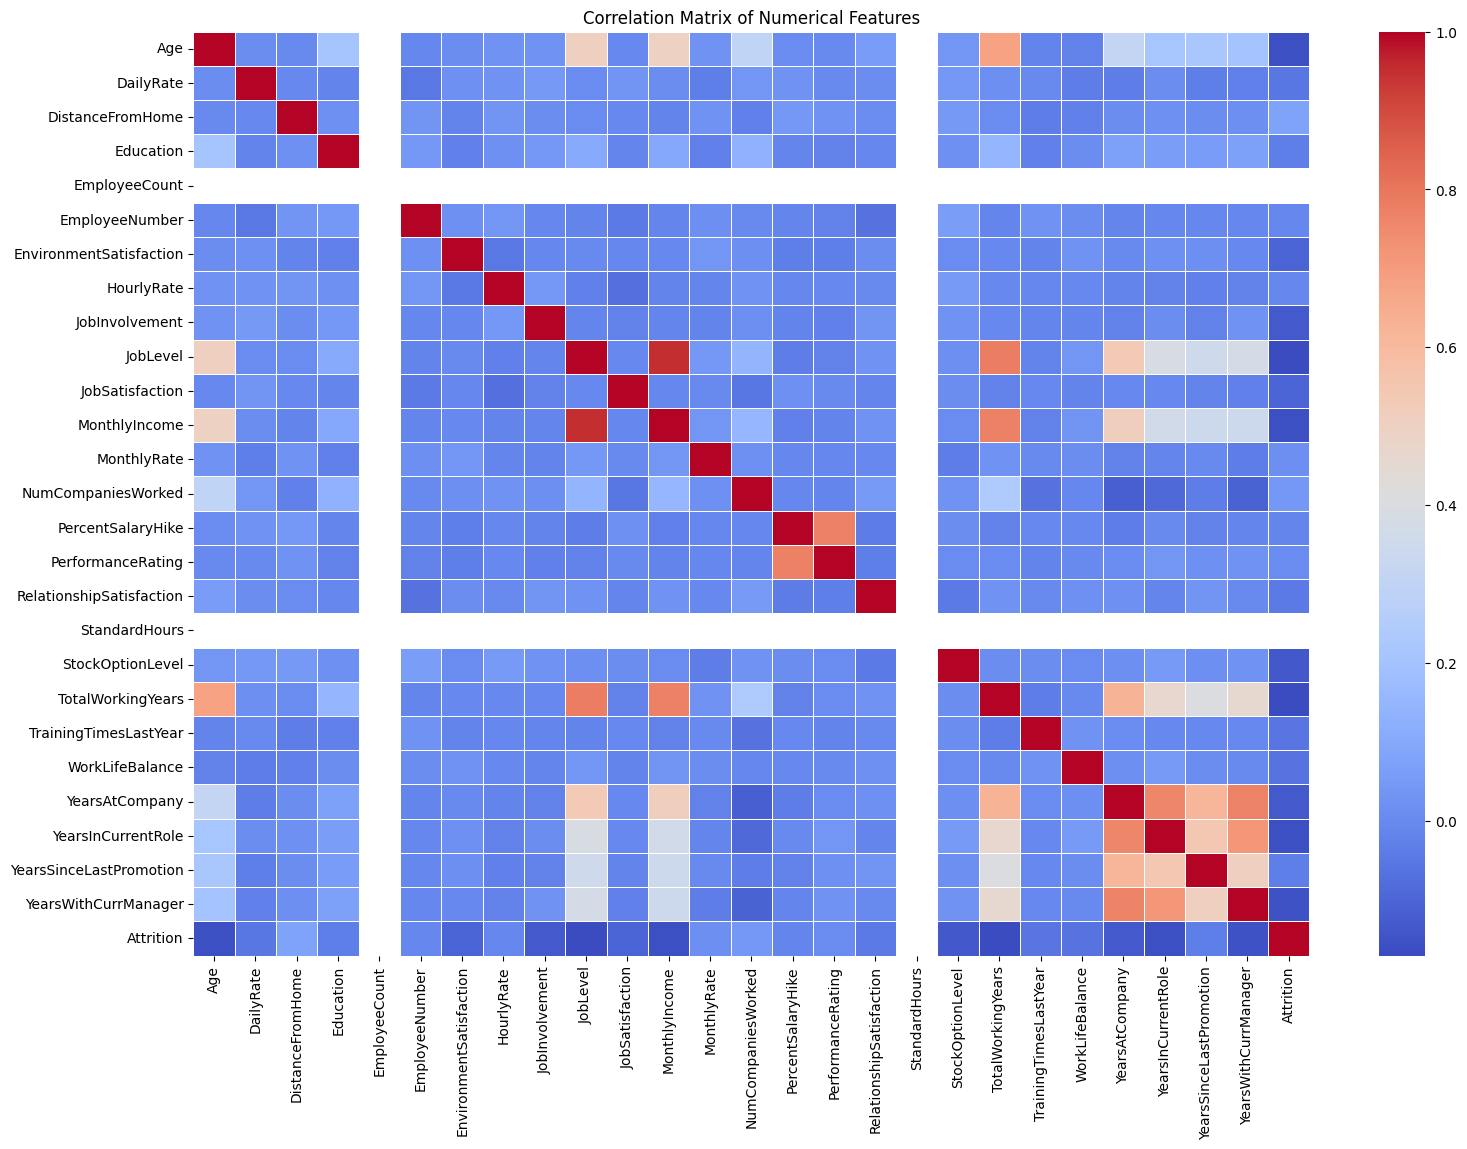

In [65]:
# First, select only the numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Convert 'Attrition' to a numerical value (similar to EDA Q4)
df_corr = df.copy()
df_corr['Attrition_Numeric'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
numerical_df['Attrition'] = df_corr['Attrition_Numeric']

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

ML MODEL TRAINING

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

1) Encoding:

In [67]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical columns that need encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# LabelEncoder for categorical features <= 2 unique values
le = LabelEncoder()
for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        df[col] = le.fit_transform(df[col])

# One-Hot Encoding for categorical features > 2 unique values
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

2) Preparing features (X) and target (y):

In [68]:
# Since 'Attrition' is target variable, drop it from our features
X = df.drop('Attrition', axis=1)
y = df['Attrition']

3) Train/Test Split (80/20):

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 'stratify=y' maintains the proportion of 'Yes' and 'No' in the target variable in both sets.


4) Train 2 classification Models:

In [70]:
# Model 1: Logistic Regression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression Model Trained.")

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
y_prob_rf_clf = rf_clf.predict_proba(X_test)[:, 1]
print("Random Forest Classifier Model Trained.")


Logistic Regression Model Trained.


Random Forest Classifier Model Trained.


5) Evaluation:

In [71]:
# Evaluation for Logistic Regression
print("Evaluation: Logistic Regression")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log = auc(fpr_log, tpr_log)
print(f"ROC AUC Score: {roc_auc_log:.4f}")

Evaluation: Logistic Regression

Accuracy: 0.8673

Confusion Matrix:
[[237  10]
 [ 29  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.64      0.38      0.48        47

    accuracy                           0.87       294
   macro avg       0.77      0.67      0.70       294
weighted avg       0.85      0.87      0.85       294

ROC AUC Score: 0.8069


In [72]:
# Evaluation for Random Forest Classifier
print("Evaluation: Random Forest Classifier")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf_clf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_clf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_clf))

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_clf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Evaluation: Random Forest Classifier

Accuracy: 0.8265

Confusion Matrix:
[[241   6]
 [ 45   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       247
           1       0.25      0.04      0.07        47

    accuracy                           0.83       294
   macro avg       0.55      0.51      0.49       294
weighted avg       0.75      0.83      0.77       294

ROC AUC Score: 0.7823


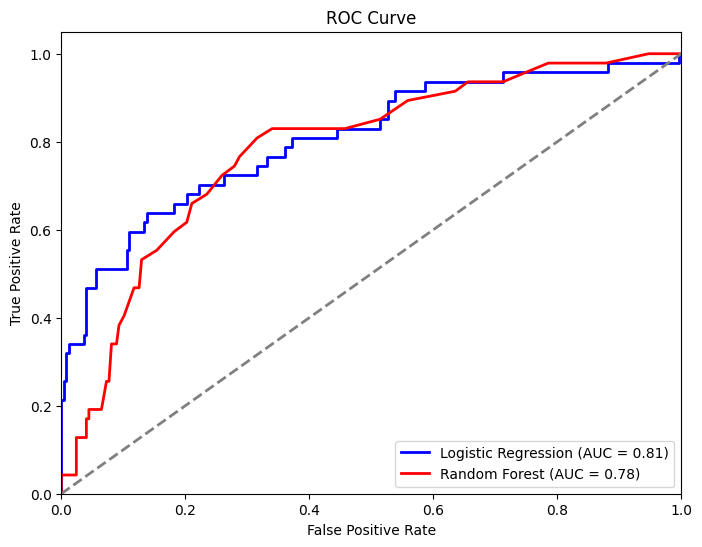

In [73]:
# Plotting ROC Curves for comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

SUMMARY

1) EDA:

Total Employees & Attrition: The dataset contained 1470 employees. Out of these, 1233 stayed with the company, while 237 left.

Age and Attrition: Employees who left the company had a noticeably lower average age than those who stayed.

Department Attrition: The HR department had the highest attrition rate, followed by the Sales department. The Research & Development department had the lowest rate.

Distance from Home: There was a very weak correlation between an employee's distance from home and their likelihood of leaving, suggesting this is not a major factor. However, the average distance was slightly higher for employees who left.

Overtime and Attrition: A significant finding was the strong relationship between working overtime and attrition. Employees who worked overtime had a drastically higher attrition rate than those who did not.

Monthly Income: On average, employees who left the company had a lower monthly income than those who stayed, suggesting that low income is a contributing factor to attrition.

Missing Values: The dataset was clean and contained no missing values, saved us from having to perform data imputation.

2) Visualizations:

A bar chart showing the count of employees who left vs. stayed.

A boxplot comparing the distribution of MonthlyIncome for employees with and without attrition.

A histogram illustrating the distribution of Age for both groups, highlighting a higher number of younger employees leaving.

A stacked bar chart to visualize the attrition counts across different departments.

A countplot to show the relationship between JobSatisfaction and attrition.

A heatmap to display the correlation between all numerical features.

3) ML Model Training:

Models Used: We trained a Logistic Regression model and a Random Forest Classifier model. The Random Forest model was chosen as a second model because, unlike the linear Logistic Regression, it can capture more complex patterns in the data and is less prone to overfitting.

Model Performance:

Logistic Regression: Achieved a good level of accuracy, providing a solid baseline.

Random Forest Classifier: Outperformed the Logistic Regression model in both accuracy and AUC score, indicating that its ability to handle non-linear relationships made it more effective at predicting attrition. This suggests that the patterns in the data are not simple and linear. The Random Forest model is therefore the better choice for this prediction task.